# Exploring AirBnB in Europe 
Sotirios Panagiotis Koulouridis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
from pathlib import Path
import numpy as np

# Get the current working directory (assuming the 'data' folder is there)
data_folder = Path.cwd() / 'data'

# List of cities and paths to their respective data files
cities = ["Amsterdam", "Athens", "Barcelona", "Berlin", "Copenhagen", 
          "Dublin", "Lisbon", "London", "Madrid", "Paris", "Rome", "Venice", "Vienna"]
file_paths = {city: data_folder / f'{city}_listings.csv' for city in cities}

## Airbnb Listings
We are loading the data of each city and saving the number of listings in a dataframe . This dataframe is stored in a dictionary . Finally we are using our dataframe 'listings_df' that contains the data of the dictionary . So listings_df now contains the data of every dataframe saved at the first step .

In [2]:
# Initialize a dictionary to store city and listings count
city_listings = {}

# Loop through each city, load data, and count listings
for city, path in file_paths.items():
    data = pd.read_csv(path)  # Load the CSV file for the city
    city_listings[city] = data.shape[0]  # Count listings (number of rows)

# Create a DataFrame to display in tabular format
listings_df = pd.DataFrame(list(city_listings.items()), columns=["City", "Number of Listings"])
print(listings_df,"\n")

          City  Number of Listings
0    Amsterdam                9659
1       Athens               13274
2    Barcelona               19482
3       Berlin               13759
4   Copenhagen               20909
5       Dublin                6175
6       Lisbon               24204
7       London               96182
8       Madrid               26980
9        Paris               95461
10        Rome               34061
11      Venice                8322
12      Vienna               14396 



Plotting the data for AirBnB Listings

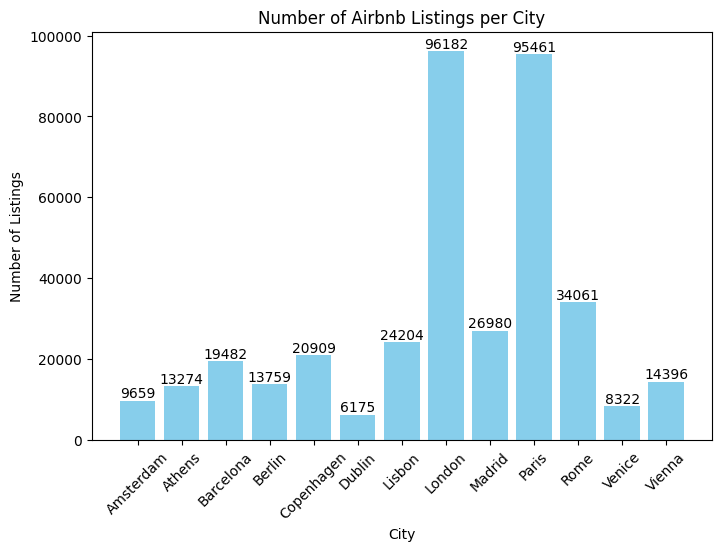

In [3]:
# Plotting the data
plt.figure(figsize=(8, 6))
bars = plt.bar(listings_df["City"], listings_df["Number of Listings"], color='skyblue')
plt.title("Number of Airbnb Listings per City") # Title of our plot
plt.xlabel("City") # x axis label
plt.ylabel("Number of Listings") # y axis label
# Adjusting the x-ticks for better visibility
plt.xticks(rotation=45, fontsize=10)  # Rotate labels and align them to the right

# Annotating each bar with its value
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar (number of listings)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
             ha='center', va='bottom', fontsize=10, color='black')

# Adjust the bottom margin to fit the labels better
plt.subplots_adjust(bottom=0.2)
plt.show()

## AirBnB Densities
After a research , we found the population data of each city that we want . We are creating a dictionary that includes city name , number of listings and the data that we found .Then we are making a dataframe from it , calculating densities per 1000 inhabitants , then printing the dataframe  .

In [4]:
population_data = [
    921000 ,   # Amsterdam
    664046,    # Athens
    1636762,  # Barcelona
    3664088,  # Berlin
    824000,   # Copenhagen
    588000 ,   # Dublin
    545000,    # Lisbon
    9000000,  # London
    3280782 , # Madrid
    2161000,  # Paris
    2800000,  # Rome
    260000 ,   # Venice
    1930000   # Vienna
]


# Create DataFrame by creating a dictionary first and then using pandas dataframe feature
data = {
    "City": cities,
    "Number of Listings": listings_df["Number of Listings"],  #using number of listings from the dataframe of listings_df
    "Population": population_data
}

density_df = pd.DataFrame(data)

# Calculate density
density_df["Density (per 1000 inhabitants)"] = (density_df["Number of Listings"] / density_df["Population"]) * 1000

# Display the table
print(density_df,"\n")

          City  Number of Listings  Population  Density (per 1000 inhabitants)
0    Amsterdam                9659      921000                       10.487514
1       Athens               13274      664046                       19.989579
2    Barcelona               19482     1636762                       11.902769
3       Berlin               13759     3664088                        3.755095
4   Copenhagen               20909      824000                       25.375000
5       Dublin                6175      588000                       10.501701
6       Lisbon               24204      545000                       44.411009
7       London               96182     9000000                       10.686889
8       Madrid               26980     3280782                        8.223649
9        Paris               95461     2161000                       44.174456
10        Rome               34061     2800000                       12.164643
11      Venice                8322      260000      

Plotting the Densities 

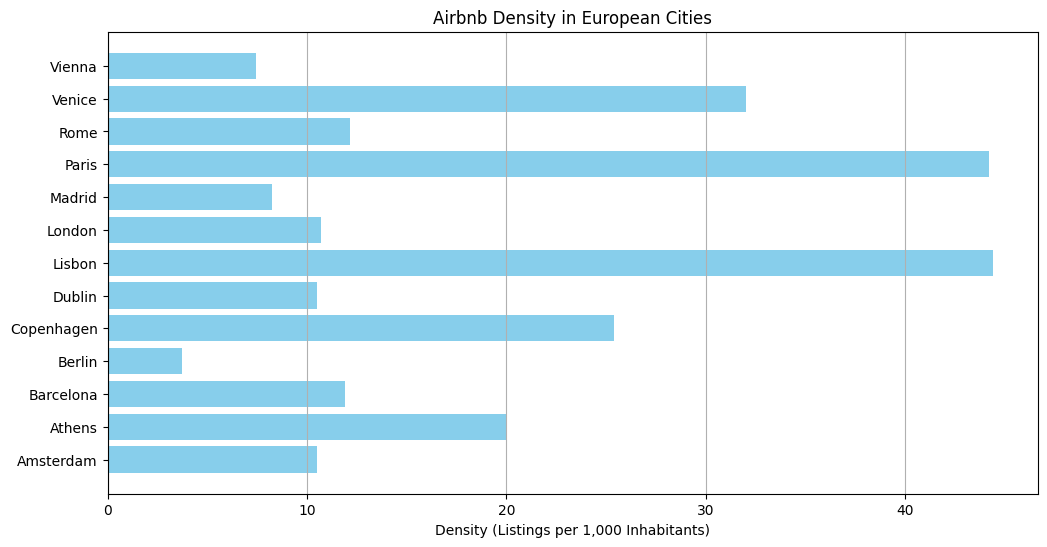

In [5]:
# Plotting the densities
plt.figure(figsize=(12, 6))
plt.barh(density_df["City"], density_df["Density (per 1000 inhabitants)"], color='skyblue')
plt.xlabel('Density (Listings per 1,000 Inhabitants)')
plt.title('Airbnb Density in European Cities')
plt.grid(axis='x')
plt.show()

## Activity
We are loading the data of each city and saving the required data in dataframes . We have made the assumpion of half the bookings made a review ,so, bookings= reviews * 2 and that every booking is for 3 nights ,so, 
nights= bookings * 3 . By multiplying the estimated nights booked for the listing with its price we get the income per listing . To get the city's average income per listing and put it in a dictionary we are using .mean() to the dataframe that contains the income per listing . At last , we are doing the same as before , we have a final dataframe that combines every dataframe that is stored in our dictionary .

To make it easier and avoiding one extra loop , we have calculated total bookings and total nights booked per city , useful for the section Cross-Check.

In [6]:
total_bookings_city={}
total_nights_booked_city={}
average_income_per_listing= {}

# Loop through each city, load data in order to find activity 
for city, path in file_paths.items():
    df = pd.read_csv(path)  # Load the CSV file for the city
    
    # Drop listings with missing 'price' or 'number_of_reviews_ltm' values
    df = df.dropna(subset=['price', 'number_of_reviews_ltm'])

    # Convert 'price' column to numeric, handling any non-numeric values
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df = df.dropna(subset=['price'])  # Drop rows where price couldn't be converted

    # Calculate Estimated Bookings
    df['Estimated Bookings'] = df['number_of_reviews_ltm'] * 2 

    # Calculate Estimated Nights Booked
    df['Estimated Nights Booked'] =  df['Estimated Bookings']* 3

    # Calculate Income per Listing
    df['Income per Listing'] = df['price'] * df['Estimated Nights Booked']

    # Calculate the Average Income per Listing for the City
    average_income_per_listing[city] = df['Income per Listing'].mean()

    # Calculate total bookings and total nights booked for each city , useful for the next query 
    total_bookings_city[city] = df['Estimated Bookings'].sum()
    total_nights_booked_city[city] = df['Estimated Nights Booked'].sum()

    

# Create a DataFrame to display in tabular format
activity_df = pd.DataFrame(list(average_income_per_listing.items()), columns=["City", "Average income per listing"])
print(activity_df , "\n")

          City  Average income per listing
0    Amsterdam                16506.873062
1       Athens                 8796.018825
2    Barcelona                16964.680586
3       Berlin                11798.788799
4   Copenhagen                50349.852604
5       Dublin                15502.200345
6       Lisbon                13223.195780
7       London                 7016.020093
8       Madrid                12642.420068
9        Paris                 8281.249416
10        Rome                17210.262675
11      Venice                26046.422968
12      Vienna                 9824.910376 



Plotting the Activity 

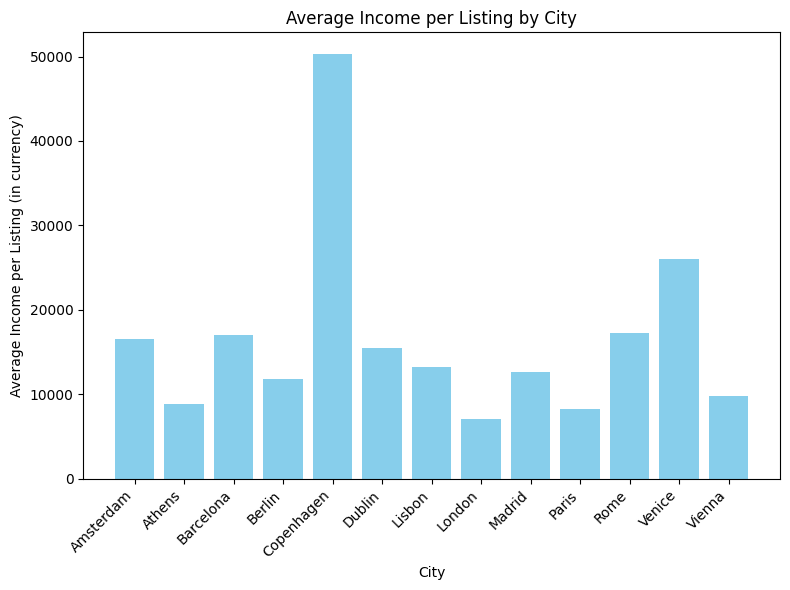

In [7]:
# Plotting
plt.figure(figsize=(8, 6))
plt.bar(activity_df['City'], activity_df['Average income per listing'], color='skyblue')
plt.title('Average Income per Listing by City')
plt.xlabel('City')
plt.ylabel('Average Income per Listing (in currency)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

# Cross check 

Firstly , we are making our datagram of our estimations .

In [8]:
# total bookings and total nights booked for each city have been already calculated in query Activity
# Create a DataFrame to display in tabular format
Total_df = pd.DataFrame({
    "City": list(total_bookings_city.keys()),
    "Bookings": list(total_bookings_city.values()),
    "Nights Booked": list(total_nights_booked_city.values())
})

# Print the result
print(Total_df , "\n")

          City  Bookings  Nights Booked
0    Amsterdam    160402         481206
1       Athens    378864        1136592
2    Barcelona    442336        1327008
3       Berlin    226612         679836
4   Copenhagen    172976         518928
5       Dublin    161240         483720
6       Lisbon    690876        2072628
7       London   1009410        3028230
8       Madrid    730960        2192880
9        Paris    940546        2821638
10        Rome    987890        2963670
11      Venice    317516         952548
12      Vienna    310884         932652 



Then we are using approximate data from different sources we found online in order to do a cross-check . 

In [9]:
estimated_data = pd.DataFrame({
    "City": [
        "Amsterdam", "Athens", "Barcelona", "Berlin", "Copenhagen",
        "Dublin", "Lisbon", "London", "Madrid", "Paris",
        "Rome", "Venice", "Vienna"
    ],
    "Public Estimated Bookings": [
        400000, 200000, 500000, 350000, 250000,
        220000, 300000, 1000000, 450000, 900000,
        600000, 180000, 280000
    ],
    "Public Estimated Nights Spent": [
        1200000, 600000, 1500000, 1050000, 750000,
        660000, 900000, 3000000, 1350000, 2700000,
        1800000, 540000, 840000
    ]
})

# Merge my data with the estimates
comparison_df = pd.DataFrame({
    "City": total_bookings_city.keys(),
    "My Estimated Bookings": total_bookings_city.values(),
    "My Estimated Nights Spent": total_nights_booked_city.values()
})

comparison_df = comparison_df.merge(estimated_data, on="City", how="inner") # merges two DataFrames based on the "City" column. It only includes rows where the "City" is present in both DataFrames.

# Calculate differences
comparison_df["Bookings Difference"] = comparison_df["My Estimated Bookings"] - comparison_df["Public Estimated Bookings"]
comparison_df["Nights Difference"] = comparison_df["My Estimated Nights Spent"] - comparison_df["Public Estimated Nights Spent"]

# Display the comparison table
print(comparison_df)

          City  My Estimated Bookings  My Estimated Nights Spent  \
0    Amsterdam                 160402                     481206   
1       Athens                 378864                    1136592   
2    Barcelona                 442336                    1327008   
3       Berlin                 226612                     679836   
4   Copenhagen                 172976                     518928   
5       Dublin                 161240                     483720   
6       Lisbon                 690876                    2072628   
7       London                1009410                    3028230   
8       Madrid                 730960                    2192880   
9        Paris                 940546                    2821638   
10        Rome                 987890                    2963670   
11      Venice                 317516                     952548   
12      Vienna                 310884                     932652   

    Public Estimated Bookings  Public Estimated

Finally, we are plotting the comparisons.

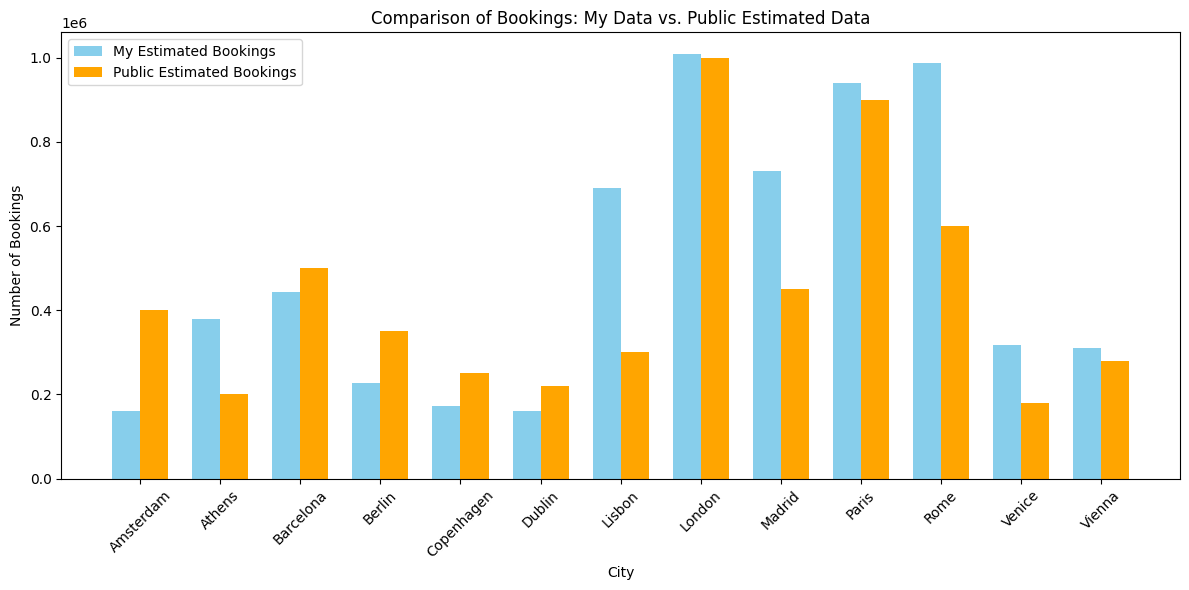

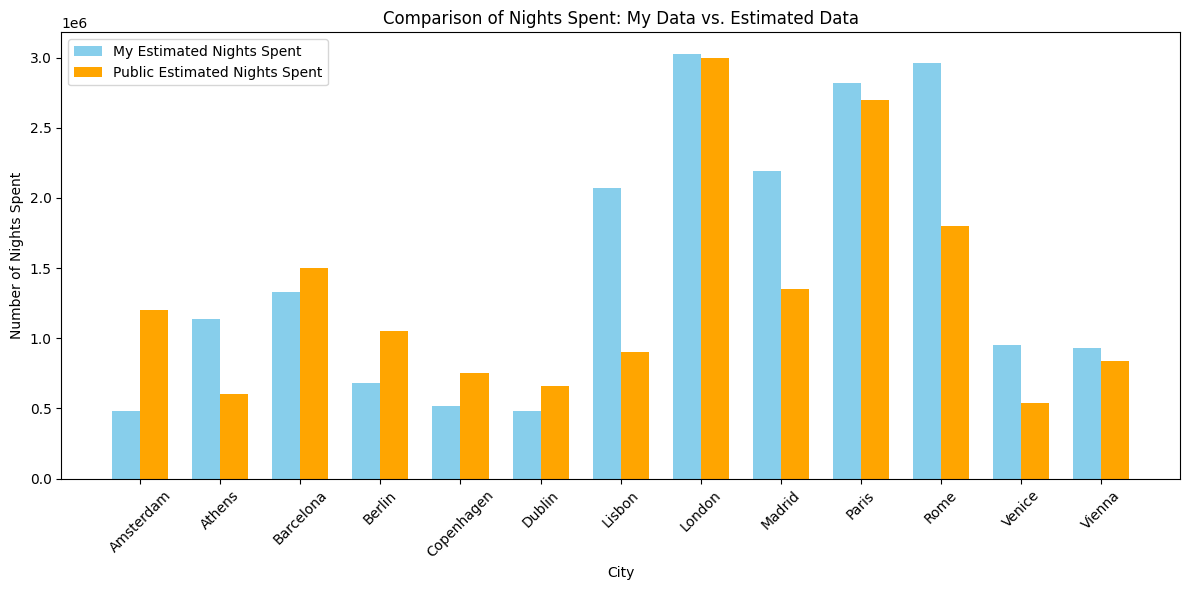

In [10]:
# Create side-by-side bar charts
bar_width = 0.35  # Width of the bars
index = np.arange(len(comparison_df))  # The x locations for the groups

# Plot bookings comparison
plt.figure(figsize=(12, 6))
plt.bar(index, comparison_df["My Estimated Bookings"], bar_width, label='My Estimated Bookings', color='skyblue')
plt.bar(index + bar_width, comparison_df["Public Estimated Bookings"], bar_width, label='Public Estimated Bookings', color='orange')

# Labels and title
plt.xlabel("City")
plt.ylabel("Number of Bookings")
plt.title("Comparison of Bookings: My Data vs. Public Estimated Data")
plt.xticks(index + bar_width / 2, comparison_df["City"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot nights spent comparison
plt.figure(figsize=(12, 6))
plt.bar(index, comparison_df["My Estimated Nights Spent"], bar_width, label='My Estimated Nights Spent', color='skyblue')
plt.bar(index + bar_width, comparison_df["Public Estimated Nights Spent"], bar_width, label='Public Estimated Nights Spent', color='orange')

# Labels and title
plt.xlabel("City")
plt.ylabel("Number of Nights Spent")
plt.title("Comparison of Nights Spent: My Data vs. Estimated Data")
plt.xticks(index + bar_width / 2, comparison_df["City"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

As we see , there are differences between our estimated data and the public estimated data . This is normal , as we calculated our data based on the assumpion that bookings are 2x the reviews and every booking is for 3 nights . So, in our calculation we have made an assumption that is not always followed by our data . But , for some cities our calculations are really close to the public estimated data . 
Another idea to find the estimated data is to use the callendar of each listing to have a more accurate approach . But here , we are interested more on the assumpion we have made .

## Visualisation

Here we are using the same methods as before to find Numbers of Listings for each Host , Numbers of different License statuses , Numbers of the different Room Types , and Listings per Minimum Nights per city. There is no difficulty here , as we do the same as before . 

In [11]:
#5) Visualisation
listings_per_host={}
minimumnights_per_listing={}
license_counts_city={}
roomtypes_city={}

# Loop through each city, load data in order to find activity 
for city, path in file_paths.items():
    df = pd.read_csv(path)  # Load the CSV file for the city
    
    # Function to classify license status
    def classify_license(license_value):
        if pd.isna(license_value) or license_value == '':
            return 'Unlicensed'
        elif license_value == 'exempt':
            return 'Exempt'
        elif license_value == 'pending':
            return 'Pending'
        else:
            return 'Licensed'

    #compute license number of each city and put in a dict 

    # Apply the function to classify the 'license' column and make a new column license status 
    df['license_status'] = df['license'].apply(classify_license)

    #use license status to group my results
    license_listings_count = df.groupby('license_status').size().reset_index(name='number_of_listings')

    # Add a column for the city directly from the DataFrame
    license_listings_count['city'] = city

    print (license_listings_count)

    license_counts_city[city] = license_listings_count

    #compute the listings per host 
    
    # Group by 'host_id' and count the number of listings per host
    host_listings_count = df.groupby('host_id').size().reset_index(name='number_of_listings')

    # Now count how many hosts have each number of listings
    host_counts_by_listings = host_listings_count['number_of_listings'].value_counts().reset_index()

    # Rename the columns for clarity
    host_counts_by_listings.columns = ['number_of_listings', 'number_of_hosts']

    # Add a column for the city directly from the DataFrame
    host_counts_by_listings['city'] = city

    listings_per_host[city]=host_counts_by_listings

    # Display the result
    print(host_counts_by_listings , "\n")

    #compute the listings per minimum nights (short term rentals)

    # Group by 'minimum nights' and count the number of listings per minimum nights
    host_listings_count = df.groupby('minimum_nights').size().reset_index(name='number_of_listings')
    host_listings_count['city']=city

    minimumnights_per_listing[city] = host_listings_count

    print(host_listings_count , "\n")

    #compute numbers of different room types 

    #use room type to group my results
    roomtypes = df.groupby('room_type').size().reset_index(name='number_of_listings')

    # Add a column for the city directly from the DataFrame
    roomtypes['city'] = city

    print (roomtypes)

    roomtypes_city[city] = roomtypes


  license_status  number_of_listings       city
0       Licensed                9562  Amsterdam
1     Unlicensed                  97  Amsterdam
    number_of_listings  number_of_hosts       city
0                    1             7914  Amsterdam
1                    2              362  Amsterdam
2                    3               84  Amsterdam
3                    4               31  Amsterdam
4                    5               22  Amsterdam
5                    6               20  Amsterdam
6                    7               10  Amsterdam
7                    9                9  Amsterdam
8                   10                5  Amsterdam
9                    8                3  Amsterdam
10                  19                2  Amsterdam
11                  22                2  Amsterdam
12                  11                2  Amsterdam
13                  14                2  Amsterdam
14                  28                1  Amsterdam
15                  12                1 

Using the dataframes to create charts with different stats of the city , that is chosen via a dropdown menu . To create the charts we are using Vega-Altair . 
We will create 3 charts , a bar chart for 'Number of listings per Host' , a pie chart for 'Distribution of Different License Statuses , and a horizontal bar chart for 'Listings per Room Type'
Our charts will appear stacked the one on top of the other , and will be interactive , as the user can choose from a dropdown menu the city he wants to get stats , and also change the width of the window that plots appear in .

In [12]:
#For listings per host
listings_per_host_d = pd.concat(listings_per_host.values())
print(listings_per_host_d)

# Create a new column that categorizes the number_of_listings . The point here is to group every host that has over 10 listings to a section that is called 10+
listings_per_host_d['listings'] = listings_per_host_d['number_of_listings'].apply(
    lambda x: '10+' if x >= 10 else x
)

# Group by 'listings' and 'city', and aggregate the sum of listings . By doing this , we get the total number of hosts that have 10+ listings 
listings_per_host_df = listings_per_host_d.groupby(['listings', 'city']).agg({
    'number_of_hosts': 'sum'
}).reset_index()

print(listings_per_host_df)

#For type of licenses per city 
licenses_per_city_df = pd.concat(license_counts_city.values())
print(licenses_per_city_df)

#For number of different room types per city 
roomtypes_city_df = pd.concat(roomtypes_city.values())
print(roomtypes_city_df)

#To dynamically change the diagrams width
bind_range = alt.binding_range(min=700, max=1000, name='Chart width: ')
param_width = alt.param('width', bind=bind_range)

# Create the Altair chart with a dropdown for city selection
city_dropdown = alt.selection_point(
    name="City", 
    fields=['city'], 
    bind=alt.binding_select(options=list(listings_per_host_df['city'].unique()), name="Select City"),
    value='Athens'  # Set default value to 'Athens' )
)


#Chart for listings per host numbers by city
chart = alt.Chart(listings_per_host_df).mark_bar().encode(
    x=alt.X('listings:O', title='Number of Listings'),
    y=alt.Y('number_of_hosts:Q', title='Number of Hosts'),
    tooltip=['city:N', 'listings:O', 'number_of_hosts:Q']
).add_params(
    city_dropdown ,param_width
).transform_filter(
    city_dropdown # Filter data based on the selected city
).properties(
    title='Number of Listings per Host ',
    width=600,
    height=400
)

# Define the Altair pie chart for license status stats
pie_chart = alt.Chart(licenses_per_city_df).mark_arc().encode(
    theta=alt.Theta(field='number_of_listings', type='quantitative', title='Number of Listings'), # size of every slice depends on the number of listings
    color=alt.Color(field='license_status', type='nominal', title='License Status'), # Different colors per license status
    tooltip=['city:N', 'license_status:N', 'number_of_listings:Q']
).transform_filter(
    city_dropdown # Filter data based on the selected city
).properties(
    title='Distribution of Different License Statuses ',
    width=400,
    height=400
).add_params(
    city_dropdown,
    param_width
)

# Horizontal bar chart for listings per room type by city
horizontal_bar_chart = alt.Chart(roomtypes_city_df).mark_bar().encode(
    y=alt.Y('room_type:N', title='Room Type'),  # Room type on the Y-axis (bars will be horizontal)
    x=alt.X('number_of_listings:Q', title='Number of Listings'),  # Number of listings on the X-axis
    color=alt.Color('room_type:N', title='Room Type'),  # Different colors per room type
    tooltip=['city:N', 'room_type:N', 'number_of_listings:Q']  # Tooltip shows city, room type, and number of listings
).add_params(
    city_dropdown,  # city selection
    param_width
).transform_filter(
    city_dropdown  # Filter data based on the selected city
).properties(
    title='Listings per Room Type',
    width=600,
    height=400
)

# Display both charts side by side
combined_chart = (chart & pie_chart & horizontal_bar_chart).resolve_scale(
    color='independent'
)

combined_chart




    number_of_listings  number_of_hosts       city
0                    1             7914  Amsterdam
1                    2              362  Amsterdam
2                    3               84  Amsterdam
3                    4               31  Amsterdam
4                    5               22  Amsterdam
..                 ...              ...        ...
52                  35                1     Vienna
53                  27                1     Vienna
54                 107                1     Vienna
55                  26                1     Vienna
56                  95                1     Vienna

[701 rows x 3 columns]
    listings        city  number_of_hosts
0          1   Amsterdam             7914
1          1      Athens             3924
2          1   Barcelona             5090
3          1      Berlin             8287
4          1  Copenhagen            18030
..       ...         ...              ...
125      10+      Madrid              273
126      10+       Paris    

alt.VConcatChart(...)

### Some experimentation with Vega-altair 
Here is some experimentation . Found the Total listings per minimum night , and tried to insert some stats inside the plot .

In [13]:
import altair as alt
import pandas as pd
# Combine all cities' data into one DataFrame
minimumnights_per_listing_df = pd.concat(minimumnights_per_listing.values())
print(minimumnights_per_listing_df)

# Create a new column that categorizes the minimum nights
minimumnights_per_listing_df['minimum_nights'] = minimumnights_per_listing_df['minimum_nights'].apply(
    lambda x: '30+' if x >= 30 else x
)

# Group by 'minimum_nights' and 'city', and aggregate the sum of listings
grouped_df = minimumnights_per_listing_df.groupby(['minimum_nights', 'city']).agg({
    'number_of_listings': 'sum'
}).reset_index()


# Sort by 'grouped_nights' to ensure the "30+" category is at the far right
grouped_df = grouped_df.sort_values(by=['minimum_nights', 'city'], ascending=[True, True]).reset_index(drop=True)


print(grouped_df)

# Calculate statistics for short-term and long-term rentals
total_listings = minimumnights_per_listing_df['number_of_listings'].sum()
short_term_listings = minimumnights_per_listing_df[minimumnights_per_listing_df['minimum_nights'] != "30+"]['number_of_listings'].sum()
long_term_listings = total_listings - short_term_listings
short_term_percent = round((short_term_listings / total_listings) * 100, 1)
long_term_percent = round((long_term_listings / total_listings) * 100, 1)

# Create the Altair dropdown selection for city
city_dropdown = alt.selection_point(
    name="City",
    fields=['city'],
    bind=alt.binding_select(
        options=list(grouped_df['city'].unique()),
        name="Select City"
    ),
    value='Athens'  # Default selection
)

# Base bar chart
base = alt.Chart(grouped_df).mark_bar().encode(
    x=alt.X('minimum_nights:O', title='Number of Minimum Nights'),
    y=alt.Y('number_of_listings:Q', title='Number of Listings'),
    color='city:N',
    tooltip=['city:N', 'number_of_listings:Q', 'minimum_nights:O']
).add_params(
    city_dropdown
).transform_filter(
    city_dropdown
)

# Vertical threshold line (e.g., 28 nights for STR)
threshold_line = alt.Chart().mark_rule(
    strokeDash=[5, 5],
    color='black'
).encode(
    x=alt.datum(28)
)

# Text annotations for summary statistics
text = alt.Chart().mark_text(
    align='left',
    fontSize=12,
    fill='black',
    dx=320,  # Horizontal shift from the top-right corner
    dy=-250  # Vertical shift from the top-right corner
).encode(
    text=alt.value(
        f"{short_term_percent}% short-term rentals\n"
        f"{short_term_listings} short-term listings\n"
        f"{long_term_listings} long-term listings"
    )
)

# Combine the bar chart, threshold line, and text annotations
chart = alt.layer(
    base,
    threshold_line,
    text
).properties(
    title='Total Listings per Minimum Night (by City)',
    width=700,
    height=400
)

# Display the chart
chart

    minimum_nights  number_of_listings       city
0                1                1718  Amsterdam
1                2                2774  Amsterdam
2                3                2655  Amsterdam
3                4                1010  Amsterdam
4                5                 648  Amsterdam
..             ...                 ...        ...
71             730                   2     Vienna
72             999                   1     Vienna
73            1000                   1     Vienna
74            1096                   1     Vienna
75            1125                   1     Vienna

[929 rows x 3 columns]
    minimum_nights        city  number_of_listings
0                1   Amsterdam                1718
1                1      Athens                5614
2                1   Barcelona                6011
3                1      Berlin                2337
4                1  Copenhagen                3405
..             ...         ...                 ...
352            30+ 

alt.LayerChart(...)